## **FAKE REVIEWS DETECTION**
### **INTRODUCTION**

Online reviews significantly influence consumer decision-making. However, the authenticity of these reviews is often questionable, with fake reviews being used to manipulate public opinion and sales. The dataset utilized in this project, sourced from [Hugging Face's Amazon Reviews 2023 dataset](https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023), specifically from the **All_Beauty** category. This dataset includes detailed information such as ratings, review titles, review text, helpful votes, and whether the purchase was verified. By analyzing these features, this project aims to build a natural language processing (NLP) model that effectively identifies fake reviews and enhances trust in online platforms.

### **STAKEHOLDER IDENTIFICATION**

1. **E-commerce Platforms**: 
   - Detect and filter fake reviews to maintain customer trust and ensure accurate product feedback.
   - Use insights to improve platform reliability and foster consumer loyalty.

2. **Consumers**: 
   - Benefit from trustworthy reviews that reflect genuine user experiences.
   - Make informed purchasing decisions based on authentic feedback.

3. **Businesses**: 
   - Protect brand reputation from potential harm caused by misleading reviews.
   - Gain valuable insights into customer preferences and concerns through accurate reviews.

4. **Regulatory Bodies**: 
   - Monitor and manage the authenticity of online reviews to ensure ethical business practices.
   - Enforce compliance with guidelines against fraudulent activities.

### **PROJECT GOALS AND OBJECTIVES**

#### **OBJECTIVE**
The primary aim of this project is to develop an NLP-based model that identifies fake reviews with high accuracy. This involves analyzing textual patterns, behavioral features, and metadata to differentiate between genuine and fraudulent reviews.

#### **GOALS**

1. **Enhance Review Authenticity Detection**:
   - Build and train models to reliably classify reviews as real or fake.
   - Use metrics such as accuracy, precision, and recall to evaluate model performance.

2. **Advance NLP Techniques**:
   - Employ advanced preprocessing methods, including text tokenization, stopword removal, and lemmatization, to prepare textual data for analysis.
   - Use machine learning and natural language processing techniques such as TF-IDF and Logistic Regression to classify reviews.

3. **Facilitate Data Management**:
   - Leverage pandas and dataframes for organizing and preprocessing the dataset efficiently.
   - Explore patterns in metadata, such as helpful votes, verified purchase status, and timestamps, to identify distinguishing features of fake reviews.

4. **Promote Consumer Trust**:
   - Provide tools that platforms and consumers can use to assess the credibility of reviews.
   - Contribute to the overall integrity and reliability of e-commerce ecosystems.

### Import libraries

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from datasets import load_dataset
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Load dataset
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)

In [ ]:
# Convert dataset to DataFrame
df = pd.DataFrame(dataset["full"])

df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701528 non-null  object 
 2   text               701528 non-null  object 
 3   images             701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 48.8+ MB


In [ ]:
# Distribution of the 'rating' column
rating_counts = df['rating'].value_counts()

# Class distribution
print("Class distribution for 'rating' column:")
print(rating_counts)

Class distribution for 'rating' column:
rating
5.0    420726
1.0    102080
4.0     79381
3.0     56307
2.0     43034
Name: count, dtype: int64


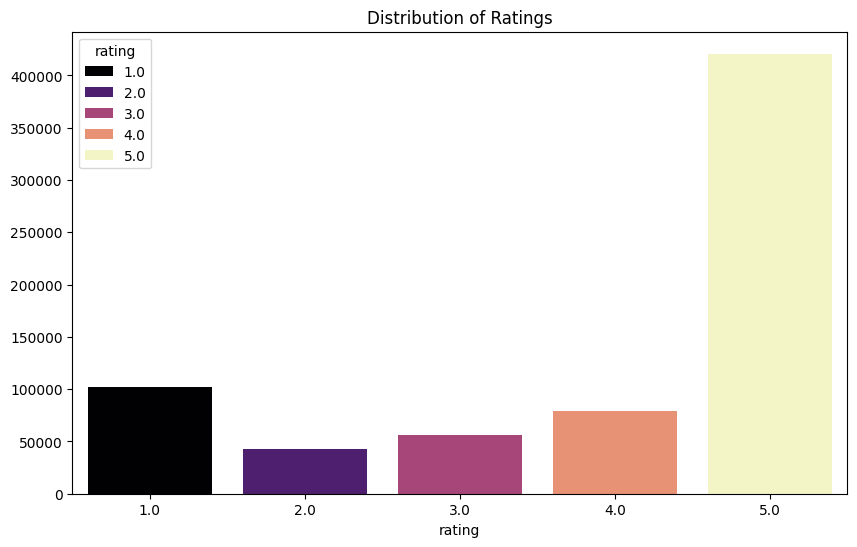

In [17]:
# Class distribution plot
plt.figure(figsize=(10,6))
plt.title('Distribution of Ratings')
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette='magma')
plt.show()